## 图形化显示海地地震危机数据

In [1]:
import pandas as pd
from pandas import DataFrame,Series
import numpy as np

data = pd.read_csv('./data/Haiti.csv')
data.describe()

,Serial,LATITUDE,LONGITUDE
count,3593.000000,3593.000000,3593.000000
mean,2080.277484,18.611495,-72.322680
std,1171.100360,0.738572,3.650776
min,4.000000,18.041313,-74.452757
25%,1074.000000,18.524070,-72.417500
50%,2163.000000,18.539269,-72.335000
75%,3088.000000,18.561820,-72.293570
max,4052.000000,50.226029,114.174287


In [2]:
# 由上述的describe可以看出，有一些异常数据
data = data[(data.LATITUDE > 18) & (data.LATITUDE < 20) & (data.LONGITUDE > -75) & (data.LONGITUDE < -70)]

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3575 entries, 0 to 3592
Data columns (total 10 columns):
Serial            3575 non-null int64
INCIDENT TITLE    3575 non-null object
INCIDENT DATE     3575 non-null object
LOCATION          3574 non-null object
DESCRIPTION       3575 non-null object
CATEGORY          3569 non-null object
LATITUDE          3575 non-null float64
LONGITUDE         3575 non-null float64
APPROVED          3575 non-null object
VERIFIED          3575 non-null object
dtypes: float64(2), int64(1), object(7)
memory usage: 209.5+ KB


In [4]:
# 由上述info可以看出CATEGORY存在空值
data = data[data.CATEGORY.notnull()]
data.describe()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3569 entries, 0 to 3592
Data columns (total 10 columns):
Serial            3569 non-null int64
INCIDENT TITLE    3569 non-null object
INCIDENT DATE     3569 non-null object
LOCATION          3568 non-null object
DESCRIPTION       3569 non-null object
CATEGORY          3569 non-null object
LATITUDE          3569 non-null float64
LONGITUDE         3569 non-null float64
APPROVED          3569 non-null object
VERIFIED          3569 non-null object
dtypes: float64(2), int64(1), object(7)
memory usage: 209.1+ KB


In [5]:
data[:10]

,Serial,INCIDENT TITLE,INCIDENT DATE,LOCATION,DESCRIPTION,CATEGORY,LATITUDE,LONGITUDE,APPROVED,VERIFIED
0,4052,* URGENT * Type O blood donations needed in #J...,05/07/2010 17:26,"Jacmel, Haiti",Birthing Clinic in Jacmel #Haiti urgently need...,"1. Urgences | Emergency, 3. Public Health,",18.233333,-72.533333,YES,NO
4,4042,Citi Soleil school,18/05/2010 16:26,"Citi Soleil, Haiti",We are working with Haitian (NGO) -The Christi...,"1. Urgences | Emergency,",18.571084,-72.334671,YES,NO
5,4041,Radio Commerce in Sarthe,26/04/2010 13:14,"Radio Commerce Shelter, Sarthe",i'm Louinel from Sarthe. I'd to know what can ...,"5e. Communication lines down,",18.593707,-72.310079,YES,NO
6,4040,Contaminated water in Baraderes.,26/04/2010 14:19,Marc near Baraderes,How do we treat water in areas without Pipe?\t...,"4. Menaces | Security Threats, 4e. Assainissem...",18.482800,-73.638800,YES,NO
7,4039,Violence at &quot;arcahaie bas Saint-Ard&quot;,26/04/2010 14:27,unable to find &quot;arcahaie bas Saint-Ard&qu...,Goodnight at (arcahaie bas Saint-Ard) 2 young ...,"4. Menaces | Security Threats,",18.415000,-73.195000,YES,NO
8,4038,No electricity in pernier,15/03/2010 10:58,Pernier,why the people who lives in pernier doesn't fi...,"2. Urgences logistiques | Vital Lines, 2f. San...",18.517443,-72.236841,YES,NO
9,4037,Shelter and food needed at Lamentin 54 and Rue...,15/03/2010 11:00,Intersection of Lamentin 54 and Rue St Juste,"GOOD EVENING ONG, I'M VERY HAPPY FOR THE AID Y...","2. Urgences logistiques | Vital Lines, 2d. Ref...",18.547790,-72.410010,YES,NO
10,4036,"Food needed, House collapsed in 1ere Section S...",15/03/2010 14:18,Assumed 1ere Section Salagnac and Salagnac de ...,"i'm living in Nip Department, First section sa...","1a. Highly vulnerable, 2. Urgences logistiques...",18.415000,-73.195000,YES,NO
11,4035,Clogged toilet in canape vert,19/03/2010 10:19,Canape Vert,Please give the message for with the concern O...,"4. Menaces | Security Threats, 4e. Assainissem...",18.539513,-72.327118,YES,NO
12,4034,Tent shelter and food needed on Lapot St. Carr...,22/03/2010 10:49,"unable to find street, mapped to Carrefour","We need tent, cover, rice. Uneted Nation never...","2. Urgences logistiques | Vital Lines, 2d. Ref...",18.534260,-72.408960,YES,NO


In [6]:
data.CATEGORY[9]

"2. Urgences logistiques | Vital Lines, 2d. Refuge | Shelter needed, 2a. Penurie d'aliments | Food Shortage, "

In [7]:
# 获取所有分类列表
def to_cat_list(catstr):
    stripped = (x.strip() for x in catstr.split(','))
    return [x for x in stripped if x]

def get_all_categories(cat_series):
    cat_sets = (set(to_cat_list(x)) for x in cat_series)
    return sorted(set.union(*cat_sets))

In [8]:
# 将各个分类信息拆分为编码和英语名称
def get_english(cat):
    code, names = cat.split('.')
    if '|' in names:
        names = names.split('|')[1]
    return code, names.strip()

In [9]:
all_categories = get_all_categories(data.CATEGORY)
all_categories

['1. Urgences | Emergency',
 '1a. Highly vulnerable',
 '1b. Urgence medicale | Medical Emergency',
 '1c. Personnes prises au piege | People trapped',
 '1d. Incendie | Fire',
 '2. Urgences logistiques | Vital Lines',
 "2a. Penurie d'aliments | Food Shortage",
 "2b. Penurie d'eau | Water shortage",
 '2c. Eau contaminee | Contaminated water',
 '2c. Probleme de securite | Security Concern',
 '2d. Refuge | Shelter needed',
 '2e. Penurie de carburant | Fuel shortage',
 '2f. Sans courant | Power Outage',
 '3. Public Health',
 '3a. Infectious human disease',
 '3b. Chronic care needs',
 '3c. Besoins en materiels et medicaments | Medical equipment and supply needs',
 "3d. OBGYN/Women's Health",
 '3e. Psychiatric need',
 '4. Menaces | Security Threats',
 '4a. Pillage | Looting',
 '4c. Group violence',
 '4e. Assainissement eau et hygiene | Water sanitation and hygiene promotion',
 '5. Infrastructure Damage',
 '5a. Structure effondres | Collapsed structure',
 '5b. Structures a risque | Unstable Str

In [10]:
# 生成器表达式
english_mapping = dict(get_english(x) for x in all_categories)
english_mapping

{'1': 'Emergency',
 '1a': 'Highly vulnerable',
 '1b': 'Medical Emergency',
 '1c': 'People trapped',
 '1d': 'Fire',
 '2': 'Vital Lines',
 '2a': 'Food Shortage',
 '2b': 'Water shortage',
 '2c': 'Security Concern',
 '2d': 'Shelter needed',
 '2e': 'Fuel shortage',
 '2f': 'Power Outage',
 '3': 'Public Health',
 '3a': 'Infectious human disease',
 '3b': 'Chronic care needs',
 '3c': 'Medical equipment and supply needs',
 '3d': "OBGYN/Women's Health",
 '3e': 'Psychiatric need',
 '4': 'Security Threats',
 '4a': 'Looting',
 '4c': 'Group violence',
 '4e': 'Water sanitation and hygiene promotion',
 '5': 'Infrastructure Damage',
 '5a': 'Collapsed structure',
 '5b': 'Unstable Structure',
 '5c': 'Road blocked',
 '5d': 'Compromised bridge',
 '5e': 'Communication lines down',
 '6': 'Natural Hazards',
 '6a': 'Deaths',
 '6b': 'Missing Persons',
 '6c': 'Earthquake and aftershocks',
 '7': 'Services Available',
 '7a': 'Food distribution point',
 '7b': 'Water distribution point',
 '7c': 'Non-food aid distribu

In [11]:
def get_code(seq):
    return [x.split('.')[0] for x in seq if x]

all_codes = get_code(all_categories)
all_codes
# 抽取唯一的分类编码
code_index = pd.Index(np.unique(all_codes))
# 构造全零DataFrame
dummy_frame = DataFrame(np.zeros((len(data), len(code_index))), index=data.index, columns=code_index)
dummy_frame

,1,1a,1b,1c,1d,2,2a,2b,2c,2d,...,7c,7d,7g,7h,8,8a,8c,8d,8e,8f
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
# 构造矩阵 将dummy_frame[index, codes]置为1，当data有数据与之对应
for row, cat in zip(data.index, data.CATEGORY):
    codes = get_code(to_cat_list(cat))
    dummy_frame.loc[row, codes] = 1

In [13]:
dummy_frame

,1,1a,1b,1c,1d,2,2a,2b,2c,2d,...,7c,7d,7g,7h,8,8a,8c,8d,8e,8f
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
data[:1]['CATEGORY'] 

0    1. Urgences | Emergency, 3. Public Health, 
Name: CATEGORY, dtype: object

In [15]:
# prefix：前缀
data = data.join(dummy_frame.add_prefix('category_'))

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3569 entries, 0 to 3592
Data columns (total 55 columns):
Serial            3569 non-null int64
INCIDENT TITLE    3569 non-null object
INCIDENT DATE     3569 non-null object
LOCATION          3568 non-null object
DESCRIPTION       3569 non-null object
CATEGORY          3569 non-null object
LATITUDE          3569 non-null float64
LONGITUDE         3569 non-null float64
APPROVED          3569 non-null object
VERIFIED          3569 non-null object
category_1        3569 non-null float64
category_1a       3569 non-null float64
category_1b       3569 non-null float64
category_1c       3569 non-null float64
category_1d       3569 non-null float64
category_2        3569 non-null float64
category_2a       3569 non-null float64
category_2b       3569 non-null float64
category_2c       3569 non-null float64
category_2d       3569 non-null float64
category_2e       3569 non-null float64
category_2f       3569 non-null float64
category_3        3569

In [17]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

In [18]:
def basic_haiti_map(ax=None, lllat=17.25, urlat=20.25, lllon=-75, urlon=-71):
    m = Basemap(ax=ax, projection='stere', 
                lon_0=(lllon+urlon)/2, lat_0=(lllat+urlat)/2, 
                llcrnrlat=lllat, urcrnrlat=urlat, 
                llcrnrlon=lllon,urcrnrlon=urlon, 
                resolution='f')
    m.drawcoastlines()
    m.drawstates()
    m.drawcounties()
    return m

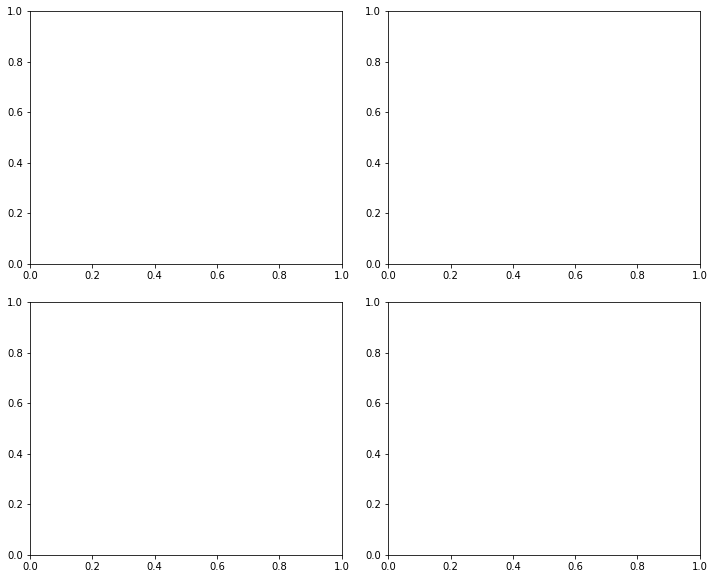

In [22]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize=(12, 10))
fig.subplots_adjust(hspace=0.15, wspace=0.15)

In [23]:
to_plot = ['2a', '1', '3c', '7a']
lllat = 17.25
urlat=20.25
lllon=-75
urlon=-71

In [24]:
for code, ax in zip(to_plot, axes.flat):
    m = basic_haiti_map(ax, lllat=lllat, urlat=urlat, lllon=lllon, urlon=urlon)

In [25]:
cat_data = data[data['category_%s' %code] == 1]

In [32]:
x,y = m(cat_data.LONGITUDE.values, cat_data.LATITUDE.values)

In [35]:
m.plot(x, y, 'k.', alpha=0.5)
ax.set_title('%s, %s' %(code, english_mapping[code]))

Text(0.5, 1.0, '7a, Food distribution point')

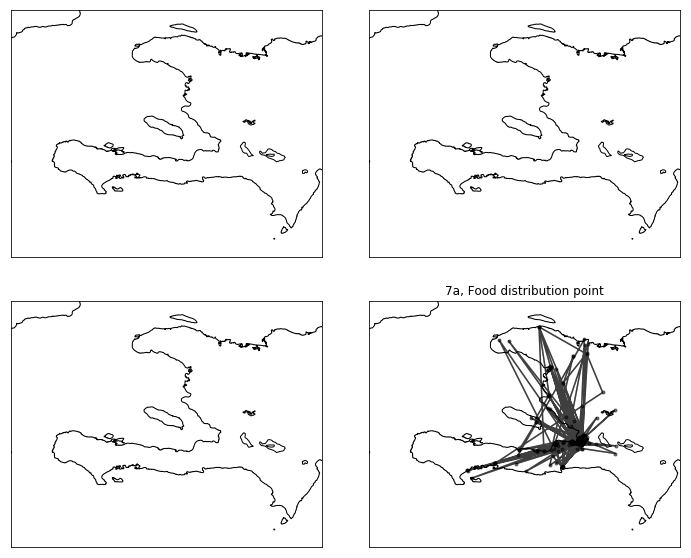

In [36]:
fig